<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

In [0]:
#@title Introducing Colaboratory { display-mode: "form" }
#@markdown This 3-minute video gives an overview of the key features of Colaboratory:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI', width=600, height=400)

## Getting Started

The document you are reading is a  [Jupyter notebook](https://jupyter.org/), hosted in Colaboratory. It is not a static page, but an interactive environment that lets you write and execute code in Python and other languages.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [0]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter".

All cells modify the same global state, so variables that you define by executing a cell can be used in other cells:

In [0]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

For more information about working with Colaboratory notebooks, see [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb).


## More Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

## Machine Learning Examples: Seedbank

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [Seedbank](https://research.google.com/seedbank/) project.

A few featured examples:

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): Use deep learning to transfer style between images.
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): Classify fashion-related images with deep learning.
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): Create a generative model of handwritten digits.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import pickle

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from __future__ import print_function, division
import os
import torch
import torch.nn as nn
import torch.nn.functional as F     
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import time
import os
import copy

use_gpu = torch.cuda.is_available()

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



model_conv = torchvision.models.resnet18(pretrained=False)
#print(model_conv)
#num_ftrs = model_conv.fc.in_features

num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 10)
model_conv = model_conv.to(device)
# model_conv.load_state_dict(torch.load('/content/drive/My Drive/DLCP/resnet_wei.pth'))

criterion = nn.CrossEntropyLoss()

optimizer_conv = optim.SGD(model_conv.parameters(), lr=0.0005,momentum=0.9, weight_decay=0.0001)
# exp_lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer_conv, 'min', patience=2, verbose=True, factor = 0.2)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer_conv, 2, gamma=0.5, last_epoch=-1)

In [0]:
resize = [224,224]
data_transforms = {
        'train': transforms.Compose([
            transforms.Resize(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.2066, 0.240, 0.186])
        ]),
        'test': transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.2066, 0.240, 0.186]),    
        ]),
    }


In [0]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=data_transforms['train'])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=data_transforms['test'])
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
size_train = len(trainset)
size_test = len(testset)
print(size_train)
print(size_test)

50000
10000


In [0]:
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    since = time.time()
    best_model_wts = model.state_dict()
    best_acc = 0.0
    best_error=2.0
    best_model_wts1 = model.state_dict()

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and vali dation phase
        for phase in ['train']:
            
            k=0;
            running_loss = 0.0
            running_corrects = 0

            if(phase=='train'):
                model.train()
                print(phase)
                print(time.time()-since)
                for inputs, labels in trainloader:
                    k +=1
                    if(k%100 ==0):
                    	print(k/100)

                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    optimizer.zero_grad()
                    

                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs.data, 1)
                        loss = criterion(outputs, labels)


                    #computing loss

                    loss.backward()
                    optimizer.step()
                    #print(time.time() - since)
                    running_loss += loss.item()*inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                epoch_loss = (running_loss*1.0) / size_train
                epoch_acc = (running_corrects.double()) / size_train
                scheduler.step()

                    
                f=open("/content/drive/My Drive/DLCP/resnet-tr-loss.txt" , "a+")
                f.write(str(epoch_loss))
                f.write("\n")
                f.close()
                f=open("/content/drive/My Drive/DLCP/resnet-tr-acc.txt" , "a+")
                f.write(str(epoch_acc))
                f.write("\n")
                f.close()
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            total_correct = 0
            total_images = 0
            for data in testloader:
              images, labels = data
              images = images.to(device)
              labels = labels.to(device)
              outputs = model(images)
              _, predicted = torch.max(outputs.data, 1)
              total_images += labels.size(0)
              total_correct += (predicted == labels).sum().item()
            model_accuracy = total_correct / total_images * 100
            print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))
            

            # deep copy the model
            best_acc = epoch_acc
            best_model_wts = copy.deepcopy(model.state_dict())

            print('Best val Acc: {:4f}'.format(best_acc))
            print('Least val Err: {:4f}'.format(best_error))   
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    torch.save(best_model_wts,'/content/drive/My Drive/DLCP/resnet_wei.pth')
    return model

model_ft = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler,
                       num_epochs=40)

Epoch 0/39
----------
train
0.002196788787841797
1.0
2.0
3.0
4.0
5.0
6.0
7.0
train Loss: 1.2996 Acc: 0.5312
Model accuracy on 10000 test images: 53.64%
Best val Acc: 0.531200
Least val Err: 2.000000

Epoch 1/39
----------
train
331.7945828437805
1.0
2.0
3.0
4.0
5.0
6.0
7.0
train Loss: 1.2214 Acc: 0.5581
Model accuracy on 10000 test images: 56.28%
Best val Acc: 0.558080
Least val Err: 2.000000

Epoch 2/39
----------
train
659.4302053451538
1.0
2.0
3.0
4.0
5.0
6.0
7.0
train Loss: 1.1557 Acc: 0.5856
Model accuracy on 10000 test images: 58.26%
Best val Acc: 0.585560
Least val Err: 2.000000

Epoch 3/39
----------
train
985.702559709549
1.0
2.0
3.0
4.0
5.0
6.0
7.0
train Loss: 1.1227 Acc: 0.5971
Model accuracy on 10000 test images: 59.26%
Best val Acc: 0.597120
Least val Err: 2.000000

Epoch 4/39
----------
train
1314.3897042274475
1.0
2.0
3.0
4.0
5.0
6.0
7.0
train Loss: 1.0870 Acc: 0.6098
Model accuracy on 10000 test images: 60.61%
Best val Acc: 0.609840
Least val Err: 2.000000

Epoch 5/39
-

In [0]:
from __future__ import print_function, division
import os
import torch
import torch.nn as nn
import torch.nn.functional as F     
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import time
import os
import copy
from matplotlib import pyplot as plt

use_gpu = torch.cuda.is_available()

In [0]:
resize = [224,224]
data_transforms = {
        'train': transforms.Compose([
            transforms.Resize(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.2066, 0.240, 0.186])
        ]),
        'test': transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.2066, 0.240, 0.186]),    
        ]),
    }


In [0]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=data_transforms['test'])
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified


In [0]:
# net.load_state_dict(torch.load('/content/drive/My Drive/DLCP/resnet_wei.pth'))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



model_ft = torchvision.models.resnet18(pretrained=True)
#print(model_conv)
#num_ftrs = model_conv.fc.in_features

num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 10)
model_ft = model_ft.to(device)
model_ft.load_state_dict(torch.load('/content/drive/My Drive/DLCP/resnet_wei.pth'))


total_correct = 0
total_images = 0
confusion_matrix = np.zeros([10,10], int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        for i, l in enumerate(labels):
            confusion_matrix[l.item(), predicted[i].item()] += 1 

model_accuracy = total_correct / total_images * 100
print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))


Model accuracy on 10000 test images: 76.22%


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')
print('{0:10s} - {1}'.format('Category','Accuracy'))
for i, r in enumerate(confusion_matrix):
    print('{0:10s} - {1:.1f}'.format(classes[i], r[i]/np.sum(r)*100))

Category   - Accuracy
plane      - 85.7
car        - 88.6
bird       - 68.9
cat        - 70.2
deer       - 61.0
dog        - 68.7
frog       - 81.4
horse      - 83.5
ship       - 68.2
truck      - 86.0


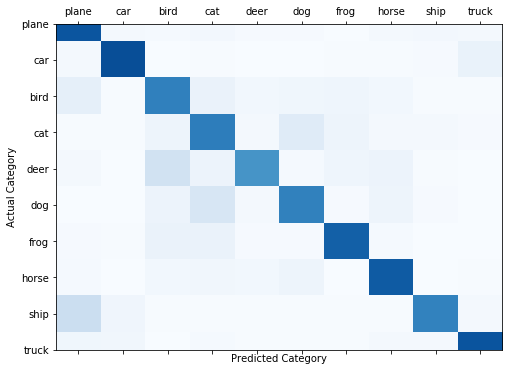

In [0]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()

In [0]:
print('actual/pred'.ljust(16), end='')
for i,c in enumerate(classes):
    print(c.ljust(10), end='')
print()
for i,r in enumerate(confusion_matrix):
    print(classes[i].ljust(16), end='')
    for idx, p in enumerate(r):
        print(str(p).ljust(10), end='')
    print()
    
    r = r/np.sum(r)
    print(''.ljust(16), end='')
    for idx, p in enumerate(r):
        print(str(p).ljust(10), end='')
    print()

actual/pred     plane     car       bird      cat       deer      dog       frog      horse     ship      truck     
plane           949       5         5         6         1         0         1         4         22        7         
                0.949     0.005     0.005     0.006     0.001     0.0       0.001     0.004     0.022     0.007     
car             3         967       0         1         0         0         0         1         3         25        
                0.003     0.967     0.0       0.001     0.0       0.0       0.0       0.001     0.003     0.025     
bird            18        0         909       18        23        7         20        3         2         0         
                0.018     0.0       0.909     0.018     0.023     0.007     0.02      0.003     0.002     0.0       
cat             6         1         15        853       13        76        17        11        7         1         
                0.006     0.001     0.015     0.853     0.013   

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import pickle
from __future__ import print_function, division
import os
import torch
import torch.nn as nn
import torch.nn.functional as F     
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import time
import os
import copy
from matplotlib import pyplot as plt

use_gpu = torch.cuda.is_available()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
class Unit(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Unit, self).__init__()

        self.conv = nn.Conv2d(in_channels=in_channels, kernel_size=3, out_channels=out_channels, stride=1, padding=1)
        self.bn = nn.BatchNorm2d(num_features=out_channels)
        self.relu = nn.ReLU()

    def forward(self, input):
        output = self.conv(input)
        output = self.bn(output)
        output = self.relu(output)

        return output

In [0]:
class SimpleNet(nn.Module):
    def __init__(self,num_classes=10):
        super(SimpleNet,self).__init__()
        
        #Create 14 layers of the unit with max pooling in between
        self.unit1 = Unit(in_channels=3,out_channels=32)
        self.unit2 = Unit(in_channels=32, out_channels=32)
        # self.unit3 = Unit(in_channels=32, out_channels=32)

        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.unit4 = Unit(in_channels=32, out_channels=64)
        # self.unit5 = Unit(in_channels=64, out_channels=64)
        # self.unit6 = Unit(in_channels=64, out_channels=64)
        # self.unit7 = Unit(in_channels=64, out_channels=64)

        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.unit8 = Unit(in_channels=64, out_channels=128)
        # self.unit9 = Unit(in_channels=128, out_channels=128)
        # self.unit10 = Unit(in_channels=128, out_channels=128)
        # self.unit11 = Unit(in_channels=128, out_channels=128)

        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.unit12 = Unit(in_channels=128, out_channels=128)
        # self.unit13 = Unit(in_channels=128, out_channels=128)
        # self.unit14 = Unit(in_channels=128, out_channels=128)

        self.avgpool = nn.AvgPool2d(kernel_size=4)
        
        #Add all the units into the Sequential layer in exact order
        self.net = nn.Sequential(self.unit1,  self.unit2, self.pool1, self.unit4, self.pool2, self.unit8, self.pool3,
                                 self.unit12, self.avgpool)

        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(128, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, num_classes),
        )
        

    def forward(self, input):
        output = self.net(input)
        output = output.view(-1,128)
        output = self.classifier(output)
        return output


In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = SimpleNet()
# print(model)
model_conv = model.to(device)
model_conv.load_state_dict(torch.load('/content/drive/My Drive/DLCP/CNN3/resnet_wei.pth'))

criterion = nn.CrossEntropyLoss()

optimizer_conv = optim.SGD(model_conv.parameters(), lr=0.0005,momentum=0.9, weight_decay=0.0001)
# exp_lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer_conv, 'min', patience=2, verbose=True, factor = 0.2)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer_conv, 40, gamma=0.5, last_epoch=-1)

In [0]:
resize = [224,224]
data_transforms = {
        'train': transforms.Compose([
            transforms.RandomCrop(32,padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.2066, 0.240, 0.186])
        ]),
        'test': transforms.Compose([
            # transforms.Resize(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.2066, 0.240, 0.186]),    
        ]),
    }


In [0]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=data_transforms['train'])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=data_transforms['test'])
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

0it [00:00, ?it/s]

 99%|█████████▉| 168484864/170498071 [00:12<00:00, 17213749.96it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
size_train = len(trainset)
size_test = len(testset)
print(size_train)
print(size_test)

50000
10000


In [0]:
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    since = time.time()
    best_model_wts = model.state_dict()
    best_acc = 0.0
    best_error=2.0
    best_model_wts1 = model.state_dict()

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and vali dation phase
        for phase in ['train']:
            
            k=0;
            running_loss = 0.0
            running_corrects = 0

            if(phase=='train'):
                model.train()
                print(phase)
                print(time.time()-since)
                for inputs, labels in trainloader:
                    k +=1
                    if(k%100 ==0):
                    	print(k/100)

                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    optimizer.zero_grad()
                    

                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs.data, 1)
                        loss = criterion(outputs, labels)


                    #computing loss

                    loss.backward()
                    optimizer.step()
                    #print(time.time() - since)
                    running_loss += loss.item()*inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                epoch_loss = (running_loss*1.0) / size_train
                epoch_acc = (running_corrects.double()) / size_train
                scheduler.step()

                    
                f=open("/content/drive/My Drive/DLCP/CNN3/resnet-tr-loss.txt" , "a+")
                f.write(str(epoch_loss))
                f.write("\n")
                f.close()
                f=open("/content/drive/My Drive/DLCP/CNN3/resnet-tr-acc.txt" , "a+")
                f.write(str(epoch_acc))
                f.write("\n")
                f.close()
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            total_correct = 0
            total_images = 0
            for data in testloader:
              images, labels = data
              images = images.to(device)
              labels = labels.to(device)
              outputs = model(images)
              _, predicted = torch.max(outputs.data, 1)
              total_images += labels.size(0)
              total_correct += (predicted == labels).sum().item()
            model_accuracy = total_correct / total_images * 100
            print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))
            

            # deep copy the model
            best_acc = epoch_acc
            best_model_wts = copy.deepcopy(model.state_dict())

            print('Best val Acc: {:4f}'.format(best_acc))
            print('Least val Err: {:4f}'.format(best_error))   
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    torch.save(best_model_wts,'/content/drive/My Drive/DLCP/CNN3/resnet_wei.pth')
    return model

model_ft = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler,
                       num_epochs=200)

Epoch 0/199
----------
train
0.0020589828491210938
1.0
2.0
3.0
4.0
5.0
6.0
7.0
train Loss: 2.1149 Acc: 0.2249
Model accuracy on 10000 test images: 30.56%
Best val Acc: 0.224920
Least val Err: 2.000000

Epoch 1/199
----------
train
23.20187497138977
1.0
2.0
3.0
4.0
5.0
6.0
7.0
train Loss: 1.7713 Acc: 0.3311
Model accuracy on 10000 test images: 36.85%
Best val Acc: 0.331080
Least val Err: 2.000000

Epoch 2/199
----------
train
46.208866119384766
1.0
2.0
3.0
4.0
5.0
6.0
7.0
train Loss: 1.5966 Acc: 0.3970
Model accuracy on 10000 test images: 43.06%
Best val Acc: 0.397040
Least val Err: 2.000000

Epoch 3/199
----------
train
69.12397003173828
1.0
2.0
3.0
4.0
5.0
6.0
7.0
train Loss: 1.4855 Acc: 0.4415
Model accuracy on 10000 test images: 45.43%
Best val Acc: 0.441520
Least val Err: 2.000000

Epoch 4/199
----------
train
92.18324875831604
1.0
2.0
3.0
4.0
5.0
6.0
7.0
train Loss: 1.3988 Acc: 0.4824
Model accuracy on 10000 test images: 49.51%
Best val Acc: 0.482400
Least val Err: 2.000000

Epoch

In [0]:
# net.load_state_dict(torch.load('/content/drive/My Drive/DLCP/resnet_wei.pth'))
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



# model_ft = torchvision.models.resnet18(pretrained=True)
# #print(model_conv)
# #num_ftrs = model_conv.fc.in_features

# num_ftrs = model_ft.fc.in_features
# model_ft.fc = nn.Linear(num_ftrs, 10)
# model_ft = model_ft.to(device)
# model_ft.load_state_dict(torch.load('/content/drive/My Drive/DLCP/resnet_wei.pth'))


total_correct = 0
total_images = 0
confusion_matrix = np.zeros([10,10], int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_conv(images)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        for i, l in enumerate(labels):
            confusion_matrix[l.item(), predicted[i].item()] += 1 

model_accuracy = total_correct / total_images * 100
print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))


Model accuracy on 10000 test images: 79.57%


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')
print('{0:10s} - {1}'.format('Category','Accuracy'))
for i, r in enumerate(confusion_matrix):
    print('{0:10s} - {1:.1f}'.format(classes[i], r[i]/np.sum(r)*100))

Category   - Accuracy
plane      - 77.3
car        - 91.2
bird       - 66.7
cat        - 68.1
deer       - 78.7
dog        - 69.0
frog       - 84.0
horse      - 83.6
ship       - 90.6
truck      - 86.5


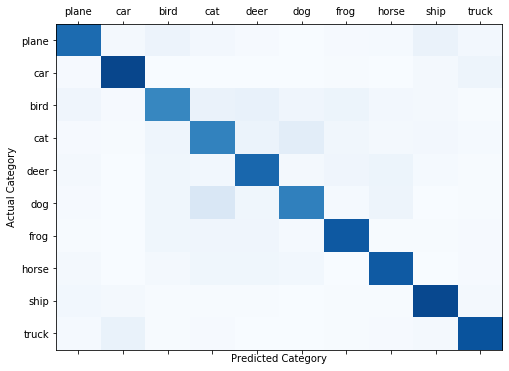

In [0]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()

In [0]:

print('actual/pred'.ljust(16), end='')
for i,c in enumerate(classes):
    print(c.ljust(10), end='')
print()
for i,r in enumerate(confusion_matrix):
    print(classes[i].ljust(16), end='')
    for idx, p in enumerate(r):
        print(str(p).ljust(10), end='')
    print()
    
    r = r/np.sum(r)
    print(''.ljust(16), end='')
    for idx, p in enumerate(r):
        print(str(p).ljust(10), end='')
    print()

actual/pred     plane     car       bird      cat       deer      dog       frog      horse     ship      truck     
plane           773       19        58        26        9         3         9         14        65        24        
                0.773     0.019     0.058     0.026     0.009     0.003     0.009     0.014     0.065     0.024     
car             11        912       1         2         1         0         4         2         17        50        
                0.011     0.912     0.001     0.002     0.001     0.0       0.004     0.002     0.017     0.05      
bird            42        8         667       65        78        40        54        24        18        4         
                0.042     0.008     0.667     0.065     0.078     0.04      0.054     0.024     0.018     0.004     
cat             11        4         43        681       60        104       35        22        25        15        
                0.011     0.004     0.043     0.681     0.06    

170500096it [00:30, 17213749.96it/s]                               